<a href="https://colab.research.google.com/github/plaban1981/Deep-Learning-KERAS/blob/master/Eye_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
! wget https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_eye.xml

--2022-10-06 17:58:16--  https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘haarcascade_eye.xml’

haarcascade_eye.xml     [ <=>                ]   3.64M  --.-KB/s    in 0.06s   

2022-10-06 17:58:17 (59.0 MB/s) - ‘haarcascade_eye.xml’ saved [3813313]



In [3]:
!tar -xvf "/content/drive/MyDrive/Qualcom/crop_part1.tar.gz" -C "/content/drive/MyDrive/Qualcom"

Streaming output truncated to the last 5000 lines.
crop_part1/14_0_0_20170110224441502.jpg.chip.jpg
crop_part1/62_0_2_20170104212649180.jpg.chip.jpg
crop_part1/24_1_3_20170104222905601.jpg.chip.jpg
crop_part1/43_0_1_20170104185752431.jpg.chip.jpg
crop_part1/18_1_4_20170103222943622.jpg.chip.jpg
crop_part1/29_1_4_20170103230119816.jpg.chip.jpg
crop_part1/1_0_2_20161219212648582.jpg.chip.jpg
crop_part1/2_0_2_20161219222111287.jpg.chip.jpg
crop_part1/65_0_0_20170111203730182.jpg.chip.jpg
crop_part1/24_1_3_20170104222402975.jpg.chip.jpg
crop_part1/13_0_0_20170110225438328.jpg.chip.jpg
crop_part1/24_0_0_20170104165239658.jpg.chip.jpg
crop_part1/47_1_0_20170109132641773.jpg.chip.jpg
crop_part1/2_1_2_20161219162336446.jpg.chip.jpg
crop_part1/21_0_4_20161223214827816.jpg.chip.jpg
crop_part1/60_0_0_20170109013457906.jpg.chip.jpg
crop_part1/68_1_0_20170110175345439.jpg.chip.jpg
crop_part1/52_1_0_20170110143721250.jpg.chip.jpg
crop_part1/28_1_1_20170103225945785.jpg.chip.jpg
crop_part1/5_1_1_2016

In [22]:
!tar -xvf "/content/drive/MyDrive/Qualcom/UTKFace.tar.gz" -C "/content/drive/MyDrive/Qualcom"

Streaming output truncated to the last 5000 lines.
UTKFace/33_1_0_20170111182452825.jpg.chip.jpg
UTKFace/26_1_1_20170116024053194.jpg.chip.jpg
UTKFace/25_1_0_20170109213232182.jpg.chip.jpg
UTKFace/28_1_1_20170112234526480.jpg.chip.jpg
UTKFace/57_0_0_20170117191704100.jpg.chip.jpg
UTKFace/27_1_1_20170117193211345.jpg.chip.jpg
UTKFace/46_1_1_20170116161237892.jpg.chip.jpg
UTKFace/24_0_2_20170116171647508.jpg.chip.jpg
UTKFace/42_1_1_20170113005712902.jpg.chip.jpg
UTKFace/25_1_1_20170116001337504.jpg.chip.jpg
UTKFace/40_1_0_20170116222110661.jpg.chip.jpg
UTKFace/50_1_0_20170109012257664.jpg.chip.jpg
UTKFace/26_1_3_20170104235421282.jpg.chip.jpg
UTKFace/7_0_0_20170110215711115.jpg.chip.jpg
UTKFace/1_1_2_20161219155353413.jpg.chip.jpg
UTKFace/26_0_1_20170117195651493.jpg.chip.jpg
UTKFace/7_0_0_20170110215648859.jpg.chip.jpg
UTKFace/64_0_0_20170117155540137.jpg.chip.jpg
UTKFace/48_0_0_20170109004813150.jpg.chip.jpg
UTKFace/39_0_0_20170103183230555.jpg.chip.jpg
UTKFace/45_0_1_20170117190019363

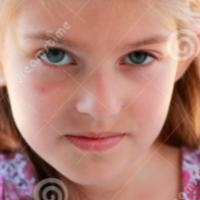

In [64]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/drive/MyDrive/Qualcom/crop_part1/6_1_0_20170109202302115.jpg.chip.jpg")
cv2_imshow(image)

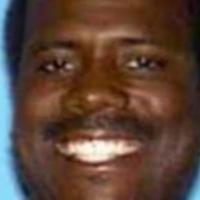

In [24]:
image = cv2.imread("/content/drive/MyDrive/Qualcom/UTKFace/39_0_1_20170117165839076.jpg.chip.jpg")
cv2_imshow(image)

In [65]:
eyes = []
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
eye = eye_cascade.detectMultiScale(image)
for (x,y,w,h) in eye:
    eye = image[y : y+h , x : x+w]
    eyes.append(eye)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [66]:
eyes[0].shape,eyes[1].shape

((46, 46, 3), (55, 55, 3))

In [7]:
width, height, ch = eyes[0].shape

In [36]:
width, height, ch

(46, 46, 3)

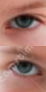

In [38]:
import numpy as np
a = np.concatenate((eyes[1], cv2.resize(eyes[0], (46, 46))), axis = 0)
cv2_imshow(a)

## right eye

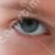

In [39]:
cv2_imshow(eyes[0])

## lefy eye

In [40]:
i = cv2.resize(eyes[1], (224,224))

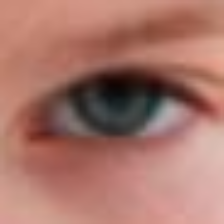

In [41]:
cv2_imshow(i)

## Resize Image – cv2.resize()

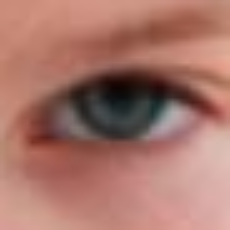

In [72]:
import cv2
 
#src = cv2.imread("/content/drive/MyDrive/Qualcom/crop_part1/6_1_0_20170109202302115.jpg.chip.jpg", cv2.IMREAD_UNCHANGED)
src = eyes[0]
#percent by which the image is resized
scale_percent = 500

#calculate the 50 percent of original dimensions
width = int(src.shape[1] * scale_percent / 100)
height = int(src.shape[0] * scale_percent / 100)

# dsize
dsize = (width, height)

# resize image
output = cv2.resize(src, dsize)
cv2_imshow(output)

In [55]:
cv2.imwrite('/cv2-resize-image-50.png',output) 

True

In [71]:
dsize

(184, 184)

In [56]:
eyes = []
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
eye = eye_cascade.detectMultiScale(output)
for (x,y,w,h) in eye:
    eye = image[y : y+h , x : x+w]
    eyes.append(eye)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [59]:
eyes[0].shape,eyes[1].shape

((24, 0, 3), (99, 99, 3))

In [63]:
cv2_imshow(eyes[0])

error: ignored

## Count the number of images

In [43]:
import os
image_path_1 = "/content/drive/MyDrive/Qualcom/crop_part1"
len(os.listdir(image_path_1))

9780

In [80]:
len(os.listdir("/content/drive/MyDrive/Qualcom/UTKFace"))

23708

In [73]:
files = os.listdir(image_path_1)

In [74]:
files[0]

'24_1_2_20170104020224692.jpg.chip.jpg'

## Labels
* The labels of each face image is embedded in the file name, formated like [age]_[gender]_[race]_[date&time].jpg

* [age] is an integer from 0 to 116, indicating the age
* [gender] is either 0 (male) or 1 (female)
* [race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
* [date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [81]:
age = []
gender = []
race = []
image_path = []
image_path1 ="/content/drive/MyDrive/Qualcom/UTKFace"
for file in os.listdir(image_path1):
  image_p = os.path.join("UTKFace",file)
  image_path.append(image_p)
  name = file.split("_")
  age.append(name[0])
  gender.append(name[1])
  race.append(name[2])


In [82]:
len(age)

23708

In [77]:
import pandas as pd
df = pd.DataFrame({'image_path':image_path,'age':age,'gender':gender,'race':race})

In [83]:
df1 = pd.DataFrame({'image_path':image_path,'age':age,'gender':gender,'race':race})

In [78]:
df.head()

,image_path,age,gender,race
0,crop_part1/24_1_2_20170104020224692.jpg.chip.jpg,24,1,2
1,crop_part1/3_1_3_20161219230106056.jpg.chip.jpg,3,1,3
2,crop_part1/35_0_0_20170105162448427.jpg.chip.jpg,35,0,0
3,crop_part1/5_0_0_20170110213554657.jpg.chip.jpg,5,0,0
4,crop_part1/23_1_4_20170103223615095.jpg.chip.jpg,23,1,4


In [79]:
df.to_csv("crop_part1.csv",index=False)

In [84]:
df1.head()

,image_path,age,gender,race
0,UTKFace/82_0_2_20170111210110290.jpg.chip.jpg,82,0,2
1,UTKFace/32_1_2_20170116180211518.jpg.chip.jpg,32,1,2
2,UTKFace/21_0_4_20170103225103768.jpg.chip.jpg,21,0,4
3,UTKFace/27_1_2_20170116171716287.jpg.chip.jpg,27,1,2
4,UTKFace/26_0_4_20170117153355923.jpg.chip.jpg,26,0,4


In [85]:
df1.to_csv("UTKface.csv",index=False)